# 1ο ΕΡΓΑΣΤΗΡΙΟ ΑΝΑΓΝΩΡΙΣΗΣ ΠΡΩΤΎΠΩΝ


(7291, 258)
(7291, 256)
(7291,)
Mean for pixel(10,10) for zero is
0.43617587939698493
Variance for pixel(10,10) for zero is
0.5344999053355629


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:90: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


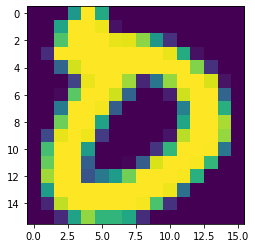

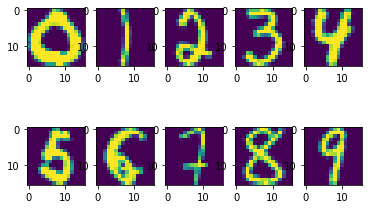

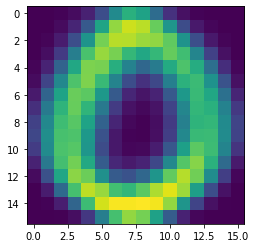

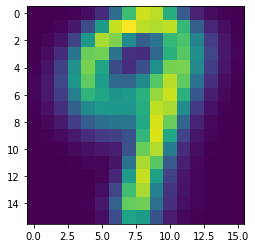

In [1]:
import numpy as np
from sklearn.datasets import load_files
from sklearn.model_selection import GridSearchCV
import pprint
import pandas as pd
import matplotlib.pyplot as plt
import statistics
from google.colab import files
import sklearn.metrics

uploaded = files.upload()


#Vima 1
# read the train data and split them in the wanted arrays
data = pd.read_csv('train.txt', sep=" ", header=None)
print (data.shape)
npdata=np.array(data)
X_train,y_train=npdata[:,1:257],npdata[:,0]
print(X_train.shape)
print(y_train.shape)
#same for test
test_data=pd.read_csv('test.txt',sep=" ",header=None)
npdata_test=np.array(test_data)
X_test,y_test=npdata_test[:,1:257],npdata_test[:,0]

#Vima 2

digit=np.reshape(X_train[130,:],(16,16))
plt.imshow(digit)

#Vima 3
np.random.seed(1111)
df = (pd.DataFrame(data.rename(columns=lambda x: f'Column {x+1}')))
N = 1
dfn = df.groupby('Column 1').apply(lambda x:x.sample(N)).reset_index(drop=True)
fig=plt.figure()
dfn=np.array(dfn)
for i in range(10):
  fig.add_subplot(2,5,i+1)
  plt.imshow(np.reshape(dfn[i,1:257],(16,16)))
  
#Vima 4
zeros=df.loc[df['Column 1'] == 0.0] #group rows than correspond to label 0
zerosn=np.array(zeros)
pixels=zerosn[:,10*17+10] #the first column is with labels, so 10*17 to reach the first element of the 10th row, +10 to reachthe 11th row (10th pixel )
mean=statistics.mean(pixels) #get the mean
print("Mean for pixel(10,10) for zero is")
print(mean)

#Vima 5
variance=statistics.variance(pixels)
print("Variance for pixel(10,10) for zero is")
print(variance)

#Vima 6
means=np.mean(zerosn,axis = 0)
means=means[1:257]
variances=np.var(zerosn,axis=0)
variances=variances[1:257]

#Vima 7
digit_0=np.reshape(means,(16,16)) #in the right shape to plot
plt.figure()
plt.imshow(digit_0)

#Vima 8

digit_0=np.reshape(variances,(16,16)) 
plt.figure()
plt.imshow(digit_0)

#Vima 9
y_X=np.concatenate((np.array([y_train]).T,X_train),axis=1)
digits=[]
means=[]
variances=[]

for i in range(10):
    #select digits with ith label
    digits=(y_X[y_X[:,0]==i, :])
    means.append(np.mean(digits,axis=0))
    #mean for each feature
    variances.append(np.var(digits,axis=0))
    means[i]=means[i][1:257]
    variances[i]=variances[i][1:257]
    #variance for each feature
    digits_i=np.reshape(means[i],(16,16))
    #reshape to plot
    fig.add_subplot(2,5,i+1)
    plt.imshow(digits_i)
  
#print("Means for all digits are")
#print (means)
#print("Variances for all digits are")
#print (variances) 




In [2]:
#Vima 10

digit=X_test[100]
#calculate distances from each label mean
dist=np.linalg.norm(means-digit,axis=1)
print("Our prediction is:")
print(np.argmin(dist))
print("Actual Value is:")
print(y_test[100])

#Vima 11

distances=[]
for i in range(10):
  distances.append(np.linalg.norm(X_test-means[i],axis=1))
distances=np.transpose(distances)
y_pred=np.argmin(distances,axis=1)
acc = sklearn.metrics.accuracy_score(y_pred,y_test)
print("Accuracy is:")
print(acc)




Our prediction is:
0
Actual Value is:
0.0
Accuracy is:
0.8141504733432985


In [0]:
# Vima 12

from sklearn.base import BaseEstimator, ClassifierMixin

class EuclideanClassifier(BaseEstimator, ClassifierMixin):  
    #"""Classify samples based on the distance from the mean feature value"""

    def __init__(self):
        self.X_mean_ = None


    def fit(self, X, y):
      """
      This should fit classifier. All the "work" should be done here.
      
      Calculates self.X_mean_ based on the mean 
      feature values in X for each class.
      
      self.X_mean_ becomes a numpy.ndarray of shape 
      (n_classes, n_features)
      
      fit always returns self.
      """
      y_X=np.concatenate((np.array([y]).T,X),axis=1)
      digits=[]
      self.X_mean_=[]
      for i in range(10):
        digits=(y_X[y_X[:,0]==i, :])
        self.X_mean_.append(np.mean(digits,axis=0))
        self.X_mean_[i]=np.array(self.X_mean_[i][1:257]) 
    
      return self


    def predict(self, X):
      distances=[]
      for i in range(10):
        distances.append(np.linalg.norm(X-self.X_mean_[i],axis=1))
      distances=np.transpose(distances)
      y_pred=np.argmin(distances,axis=1)
      return y_pred
    
    def score(self, X, y):
      acc = sklearn.metrics.accuracy_score(self.predict(X),y)
      """
      Return accuracy score on the predictions
      for X based on ground truth y
      """
 
      return acc



Score is:
0.8407163638677286


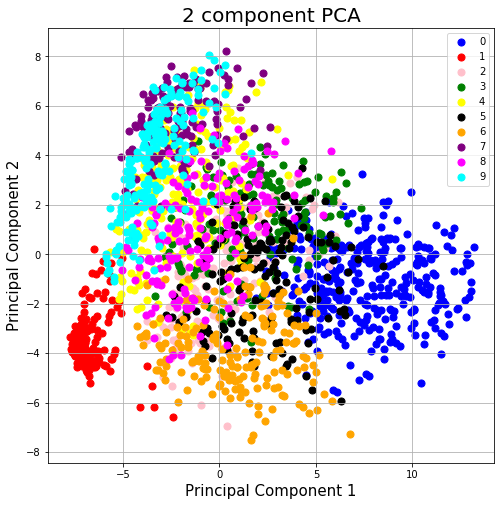

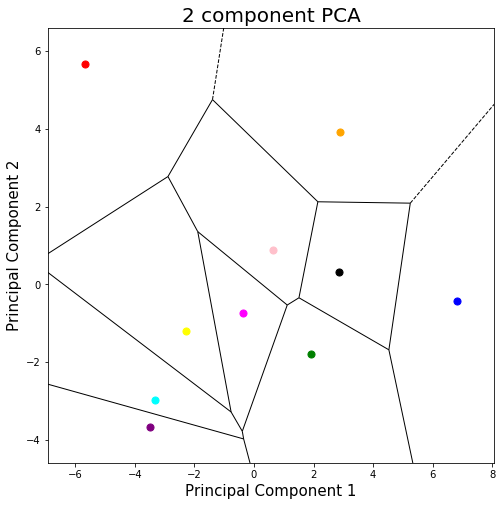

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

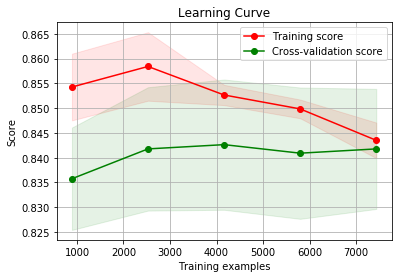

In [4]:
#Vima 13
#a

X_train=np.concatenate((X_train,X_test),axis=0)
y_train=np.concatenate((y_train,y_test),axis=0)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#5-fold cross validation score
scores = cross_val_score(EuclideanClassifier(), X_train, y_train, cv=KFold(n_splits=5, random_state=42), scoring="accuracy")
score=np.mean(scores)
print("Score is:")
print(score)

#b 1st way, plot all characteristics
clf=EuclideanClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#pca to find new features of maximum variance and facilite visualization in two dimension
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_new = pca.fit_transform(X_test)
X_newc = np.concatenate((np.array([y_pred]).T,X_new),axis=1)

labels = list(range(10))
#plot all samples in the new 2D space 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
col = ['blue', 'red', 'pink', 'green', 'yellow', 'black', 'orange', 'purple', 'magenta', 'aqua']

for target, color in zip(labels,col):
    digits=(X_newc[X_newc[:,0]==target, :])
    ax.scatter(digits[:,1]
               , digits[:,2]
               , c = color
               , s = 50)
ax.legend(labels)
ax.grid()

#in order to plot decision regions

#b second_way, with Voronoi
fig = plt.figure(figsize = (8,8))
pca = PCA(n_components=2)
#plot means in 2 dimensions as points
means_new = pca.fit_transform(clf.X_mean_)
ax2 = fig.add_subplot(1,1,1) 
ax2.set_xlabel('Principal Component 1', fontsize = 15)
ax2.set_ylabel('Principal Component 2', fontsize = 15)
ax2.set_title('2 component PCA', fontsize = 20)
for target, color in zip(labels,col):
  ax2.scatter(means_new[target,0],means_new[target,1],c=color,s=50)
  #create voronoi regions, that enclose all points with the smallest distance from region mean
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(means_new)
voronoi_plot_2d(vor,show_vertices =False,show_points=False, ax=ax2)
plt.show()

#c
from sklearn.model_selection import learning_curve

def plot_learning_curve(train_scores, test_scores, train_sizes):
    plt.figure()
    plt.title("Learning Curve")

    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


train_sizess = np.linspace(0.12, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(EuclideanClassifier(), X_train, y_train, train_sizes=train_sizess, cv=5,n_jobs=-1)

plot_learning_curve(train_scores, test_scores, train_sizes)



In [6]:
#Vhma 14



n_samples,n_features=X_train.shape
#compute apriori propabilities of i class as no_iths/no_samples
X=np.concatenate((np.array([y_train]).T,X_train),axis=1)
apriori=[ (X[X[:,0]==i, :]).shape[0]/n_samples for i in range(10) ]

#Vima 15
#Bayesian estimator
from scipy.stats import multivariate_normal
from sklearn.metrics import confusion_matrix
'''
#old solution not compatible with scikit-learn

P=np.zeros((X_test.shape[0],10))
#diagonal covariance matrix for every label
Sigma=[]
#some values are 0 (thus smoothing is required)
smoothing=10e-3
for l in range(10):
  a = np.zeros((n_features,n_features))
  np.fill_diagonal(a,[x + smoothing for x in variances[l]])
  Sigma.append(a)
  
#print(Sigma)
#P(y|x)=P(x1|y)*P(x2|y)*...P(xn|y)*P(y)/P(x) (Bayes)
#label=argmax_y(P(y|x))
#we assume that each pixel from each label follows a Gaussian distribution and that the pixels are independent from each other
#here we use log for faster computation
for l in range (10):
  P[:,l]=multivariate_normal.logpdf(X_test,mean=means[l],cov=Sigma[l])+np.log(apriori[l])
y_pred=(np.argmax(P,axis=1))

#score

score=sklearn.metrics.accuracy_score(y_pred,y_test)
'''

#comaptible with scikit-learn
class NaiveBayesianClassifier(BaseEstimator, ClassifierMixin):  

    def __init__(self):
        self.Sigma = None
        self.apriori = None
        self.P = None
        self.X_2 = None
    def fit(self, X, y):
      n_samples,n_features=X.shape
      self.X_2=np.concatenate((np.array([y]).T,X),axis=1)
      self.apriori=[ (self.X_2[self.X_2[:,0]==i, :]).shape[0]/n_samples for i in range(10) ]

      #diagonal covariance matrix for every label
      self.Sigma=[]
      #some values are 0 (thus smoothing is required)
      smoothing=10e-3
      
      for l in range(10):
        a = np.zeros((n_features,n_features))
        np.fill_diagonal(a,[x + smoothing for x in variances[l]])
        self.Sigma.append(a)

      return self

    def predict(self, X):
      self.P=np.zeros((X.shape[0],10))
      for l in range (10):
        self.P[:,l]=multivariate_normal.logpdf(X,mean=means[l],cov=self.Sigma[l])+np.log(apriori[l])
      y_pred=(np.argmax(self.P,axis=1))
      return y_pred
    
    def score(self, X, y):
      acc = sklearn.metrics.accuracy_score(self.predict(X),y)
      """
      Return accuracy score on the predictions
      for X based on ground truth y
      """
 
      return acc

#score

bc = NaiveBayesianClassifier()
bc.fit(X_train, y_train)
score = bc.score(X_test, y_test)

print("Score of our Bayes estimator is")
print(score)

#comparison to scikit implementation
from sklearn.naive_bayes import GaussianNB
clf_b = GaussianNB()
clf_b.fit(X_train, y_train)
GaussianNB(priors=apriori, var_smoothing=10e-3)
y_pred_scikit=clf_b.predict(X_test)
scikit_score=sklearn.metrics.accuracy_score(y_pred_scikit,y_test)
print("Score of scikit Bayes estimator is")
print(scikit_score)
cm_bayes = confusion_matrix(y_test, y_pred_scikit)



#Vima 16
#we repeat the previous step but our diagonal covariance matrix only consists of 1s 

P=np.zeros((X_test.shape[0],10))
for l in range (10):
  P[:,l]=multivariate_normal.logpdf(X_test,mean=means[l],cov=1)+np.log(apriori[l])
y_pred=(np.argmax(P,axis=1))
score=sklearn.metrics.accuracy_score(y_pred,y_test)

#we test our model on the initial split
print("Score of Bayes estimator with variances 1 is")
print(score)

#Support Vector Machines

#Vima 17

from sklearn import svm
#we experiment with different kernels, the polynomial kernel yields the best results

clf_svm = svm.SVC(gamma='scale',kernel='poly', probability=True)
clf_svm.fit(X_train, y_train)
y_pred_svm=clf_svm.predict(X_test)
svm_score=sklearn.metrics.accuracy_score(y_pred_svm,y_test)
print("SVM poly score is")
print(svm_score)
cm_svm=confusion_matrix(y_test, y_pred_svm)

#other svm tests that we put in comments in order to re-run the program quicker, since they are not used again later
# clf_svm = svm.SVC(gamma='scale',kernel='linear', probability=False)
# clf_svm.fit(X_train, y_train)
# y_pred_svm=clf_svm.predict(X_test)
# svm_score=sklearn.metrics.accuracy_score(y_pred_svm,y_test)
# print("SVM linear score is")
# print(svm_score)

# clf_svm = svm.SVC(gamma='scale',kernel='rbf', probability=False)
# clf_svm.fit(X_train, y_train)
# y_pred_svm=clf_svm.predict(X_test)
# svm_score=sklearn.metrics.accuracy_score(y_pred_svm,y_test)
# print("SVM rbf score is")
# print(svm_score)

# clf_svm = svm.SVC(gamma='scale',kernel='sigmoid', probability=False)
# clf_svm.fit(X_train, y_train)
# y_pred_svm=clf_svm.predict(X_test)
# svm_score=sklearn.metrics.accuracy_score(y_pred_svm,y_test)
# print("SVM sigmoid score is")
# print(svm_score)


from sklearn.neighbors import KNeighborsClassifier

#grid search to find best parameters 

# param_grid = dict(n_neighbors = list(range(1,6)))
# grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, cv = 5, iid = False, n_jobs = -1)
# grid.fit(X_train, y_train)  
# params = grid.best_params_
# print(params)

#we train our classifier and test it's accuracy in the initial split
clf_3nn = KNeighborsClassifier(n_neighbors=3)
clf_3nn.fit(X_train, y_train)
y_pred_nn = clf_3nn.predict(X_test)
score_nn = sklearn.metrics.accuracy_score(y_pred_nn,y_test)
print("3NN score is")
print(score_nn)
cm_knn=confusion_matrix(y_test,y_pred_nn)

Score of our Bayes estimator is
0.7992027902341804
Score of scikit Bayes estimator is
0.7194818136522172
Score of Bayes estimator with variances 1 is
0.8126557050323866
SVM poly score is
0.953662182361734
3NN score is
0.9446935724962631


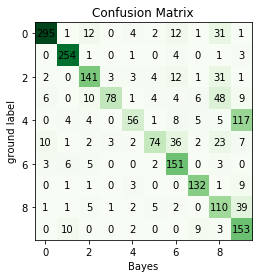

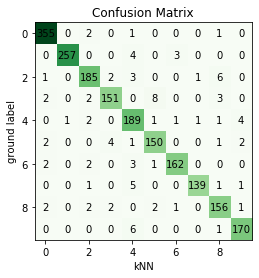

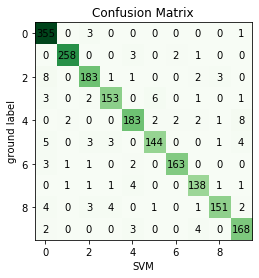

Hard Classifier score is
0.9476831091180867
Soft Classifier score is
0.9471848530144494


In [7]:
#Vima 18
#a

#we combine previously fitted classifiers with good performance,the prediction is determined by majority vote
#we plot the confusion matrixes in order to choose classifiers that don't misclassify the same digits
models = [cm_bayes , cm_svm, cm_knn]
names = ['Bayes', 'kNN', 'SVM']
for m in range(3):
  plt.imshow(models[m],interpolation = 'nearest',cmap = 'Greens')
  for (i, j), z in np.ndenumerate(models[m]):
    plt.text(j, i, z, ha='center', va='center')
  plt.title("Confusion Matrix")
  plt.xlabel(names[m])
  plt.ylabel("ground label")
  plt.show()

#we implement our hard voting classifier
from sklearn.ensemble import VotingClassifier
hard_classifier = VotingClassifier(estimators=[('bayes',clf_b), ('svm', clf_svm), ('3nn', clf_3nn)], voting='hard')
hard_classifier.fit(X_train, y_train)
y_pred_h = hard_classifier.predict(X_test)
score_h=sklearn.metrics.accuracy_score(y_pred_h,y_test)
print("Hard Classifier score is")
print(score_h)

#we implement our soft voting classifier
soft_classifier = VotingClassifier(estimators=[('bayes',clf_b), ('svm', clf_svm), ('3nn', clf_3nn)], voting='soft')
soft_classifier.fit(X_train, y_train)
y_pred_s = soft_classifier.predict(X_test)
score_s=sklearn.metrics.accuracy_score(y_pred_s,y_test)
print("Soft Classifier score is")
print(score_s)

In [8]:
#b
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator = clf_3nn,n_jobs=-1)
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)
score_bag=sklearn.metrics.accuracy_score(y_pred_bag,y_test)
print("Bagging Classifier's score is")
print(score_bag)

Bagging Classifier's score is
0.9407075236671649


In [9]:
#Vima 19
#a
from __future__ import print_function, division
import os
import torch
from skimage import io, transform
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

class DigitDataset(Dataset):
  def __init__(self, file):
    self.digits_frame = pd.read_csv(file, sep=" ", header=None)

  def __len__(self):
    return len(self.digits_frame)

  def __getitem__(self, idx):
    if torch.is_tensor(idx):
      idx = idx.tolist()

    digit = self.digits_frame.iloc[idx, 1:257]
    digit = np.array([digit])
    target = self.digits_frame.iloc[idx, 0]
    return (digit,target)

mydataset = DigitDataset('train.txt')
dataloader = DataLoader(mydataset, batch_size=32, shuffle=True, num_workers=4)


#b
class Net(torch.nn.Module):
    def __init__(self, D_in, H1,H2, D_out):
        """
        In the constructor we instantiate three nn.Linear modules and assign them as
        member variables.
        """

        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return F.log_softmax(x)
     

# N is batch size; D_in is input dimension;
# Hi is hidden dimension i; D_out is output dimension.
N, D_in, H1, H2, D_out = 32, 256, 100, 100, 10


# Create random Tensors to hold inputs and outputs
#x = torch.randn(N, D_in)
#y = torch.randn(N, D_out)

# Construct our model by instantiating the class defined above
model = Net(D_in, H1,H2, D_out)

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the three
# nn.Linear modules which are members of the model.
criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2,momentum=0.9)
#optimizer=torch.optim.Adam(model.parameters(), lr=0.01, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
epochs=20
# run the main training loop
for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(dataloader):
        data, target = Variable(data), Variable(target)
        # resize data from (batch_size, 1, 256) to (batch_size, 256)
        data = data.view(-1, 16*16)
        optimizer.zero_grad()
        net_out = model(data.float())
        loss = criterion(net_out, target.long())
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
            print(batch_idx*len(data))
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, batch_idx * len(data), len(dataloader.dataset),
                           100. * batch_idx / len(dataloader), loss.data.item()))




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


0
Train Epoch: 0 [0/7291 (0%)]	Loss: 2.290498
640
Train Epoch: 0 [640/7291 (9%)]	Loss: 2.106184
1280
Train Epoch: 0 [1280/7291 (18%)]	Loss: 1.472581
1920
Train Epoch: 0 [1920/7291 (26%)]	Loss: 0.953182
2560
Train Epoch: 0 [2560/7291 (35%)]	Loss: 0.347381
3200
Train Epoch: 0 [3200/7291 (44%)]	Loss: 0.278376
3840
Train Epoch: 0 [3840/7291 (53%)]	Loss: 0.344631
4480
Train Epoch: 0 [4480/7291 (61%)]	Loss: 0.302249
5120
Train Epoch: 0 [5120/7291 (70%)]	Loss: 0.224116
5760
Train Epoch: 0 [5760/7291 (79%)]	Loss: 0.325946
6400
Train Epoch: 0 [6400/7291 (88%)]	Loss: 0.181699
7040
Train Epoch: 0 [7040/7291 (96%)]	Loss: 0.234022
0
Train Epoch: 1 [0/7291 (0%)]	Loss: 0.120864
640
Train Epoch: 1 [640/7291 (9%)]	Loss: 0.070280
1280
Train Epoch: 1 [1280/7291 (18%)]	Loss: 0.258583
1920
Train Epoch: 1 [1920/7291 (26%)]	Loss: 0.134213
2560
Train Epoch: 1 [2560/7291 (35%)]	Loss: 0.387584
3200
Train Epoch: 1 [3200/7291 (44%)]	Loss: 0.171719
3840
Train Epoch: 1 [3840/7291 (53%)]	Loss: 0.089793
4480
Train Ep

In [10]:
mydataset_test = DigitDataset('test.txt')
test_dataloader = DataLoader(mydataset_test, batch_size=32, shuffle=True, num_workers=4)

# run a test loop
test_loss = 0
correct = 0
for data, target in test_dataloader:
    data, target = Variable(data, volatile=True), Variable(target)
    data = data.view(-1, 16 * 16)
    net_out = model(data.float())
    # sum up batch loss
    test_loss += criterion(net_out, target.long()).data.item()
    pred = net_out.data.max(1)[1]  # get the index of the max log-probability
    correct += pred.eq(target.data).sum()

test_loss /= len(test_dataloader.dataset)
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_dataloader.dataset),
        100. * correct / len(test_dataloader.dataset)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.



Test set: Average loss: 0.0101, Accuracy: 1881/2007 (94%)

